# Cifar -10 이미지 분류 V2

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
import matplotlib.pyplot as plt


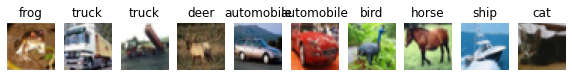

In [6]:
plt.figure(figsize = (10,2))
for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(X_train[i]) , plt.axis('off')
    plt.title(class_names[y_train[i,0]])

plt.show()
    

In [7]:
# X data : 정규화, 0~1 사이의 실수(float32)로 변환 # 
X_train = X_train.astype('float32') / 255.  # 0~255의 값이 있는데 cNN같은 경우 0~1인 경우가 최적의 성능을 낼수 있어서 나눔
X_test = X_test.astype(np.float32) /255.    # 그냥 변환하면 실수 64bit가 디폴트값, 우리는 32비트로 사용하기 때문에 32로 함


In [8]:
# Y data : one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding = 'same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), padding = 'same', input_shape=(32, 32, 3), activation='relu'),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

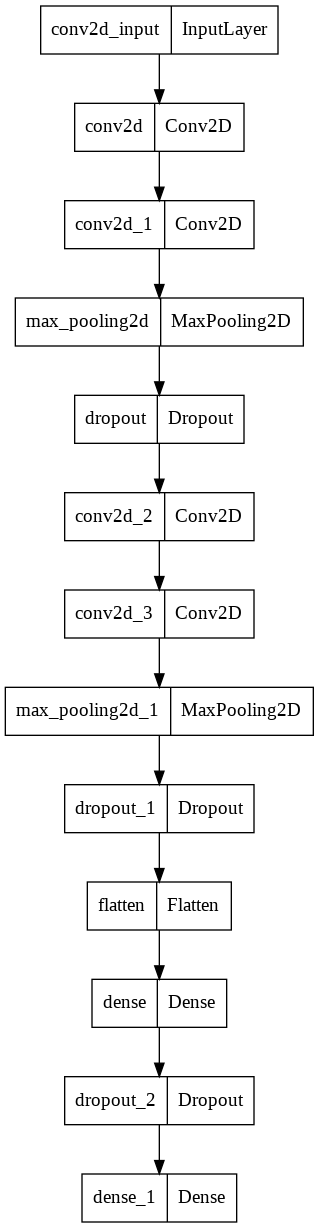

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [13]:
model_path = 'best-cifar10-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [14]:
hist = model.fit(
    X_train, Y_train, validation_split= 0.2,
    epochs=100, 
    batch_size = 32,
    verbose=2, 
    callbacks=[checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.57313, saving model to best-cifar10-v1.h5
1250/1250 - 29s - loss: 1.8270 - accuracy: 0.3286 - val_loss: 1.5731 - val_accuracy: 0.4272 - 29s/epoch - 24ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 1.57313 to 1.38064, saving model to best-cifar10-v1.h5
1250/1250 - 20s - loss: 1.5216 - accuracy: 0.4427 - val_loss: 1.3806 - val_accuracy: 0.5037 - 20s/epoch - 16ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 1.38064 to 1.27633, saving model to best-cifar10-v1.h5
1250/1250 - 20s - loss: 1.3968 - accuracy: 0.4934 - val_loss: 1.2763 - val_accuracy: 0.5512 - 20s/epoch - 16ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 1.27633 to 1.24496, saving model to best-cifar10-v1.h5
1250/1250 - 20s - loss: 1.3014 - accuracy: 0.5340 - val_loss: 1.2450 - val_accuracy: 0.5531 - 20s/epoch - 16ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 1.24496 to 1.19399, saving model to best-cifar10-v1.h5
1250/1250 - 21s - lo

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6695 - accuracy: 0.7775


[0.6695212125778198, 0.7774999737739563]

In [16]:
import numpy as np
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

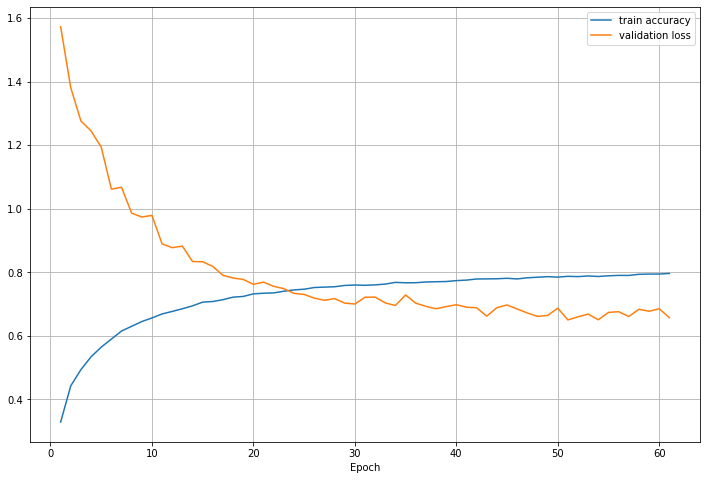

In [17]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [18]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

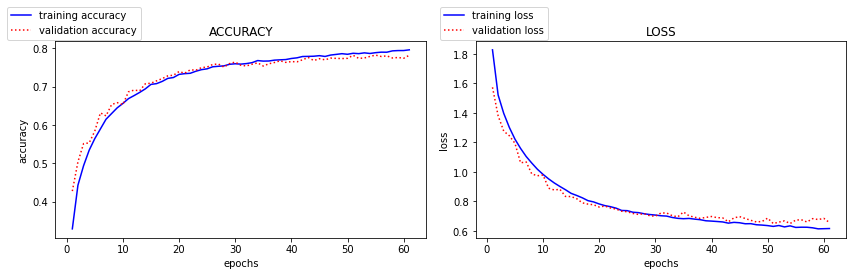

In [20]:
plot_history(hist)